---
# Datasaurus

En el siguiente dataset, haremos un análisis forense de este misterioso set de datos para descubrir insights, utilizando técnicas de análisis exploratorio.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DatasaurusDozen.tsv', sep='\t')

In [3]:
df.head(2)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256


### Análisis Exploratorio Inicial

Realice un análisis exploratorio inicial en donde pueda determinar:

- Estructura del dataframe
- Cantidad de datos
- Valores nulos
- Valores duplicados
- Outlaiers

In [4]:
# - Estructura del dataframe
display(df.info())
# - Estadísticas descriptivas
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


None

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [5]:
# - Cantidad de datos
df.shape

(1846, 3)

In [6]:
# - Valores nulos
display(df.isnull().sum())

# - Valores duplicados
display(df.duplicated().sum())

,0
dataset,0
x,0
y,0


np.int64(0)

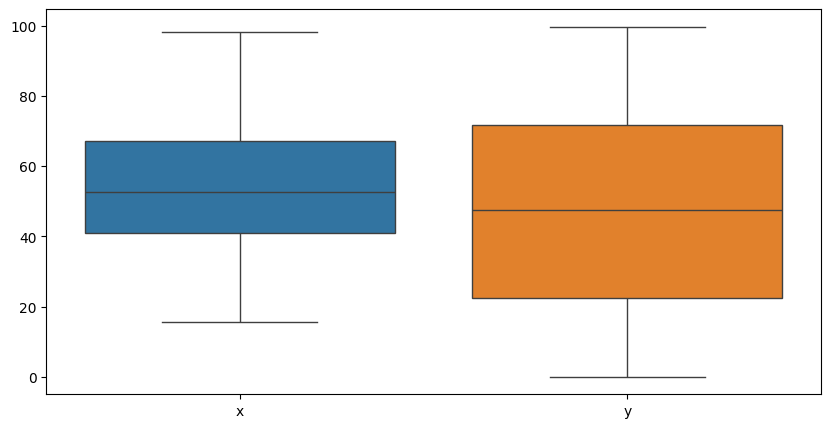

In [7]:
# - Outlaiers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['x', 'y']])
plt.show()

# limpieza de outliers
Q1 = df[['x', 'y']].quantile(0.25)
Q3 = df[['x', 'y']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[~((df[['x', 'y']] < lower_bound) | (df[['x', 'y']] > upper_bound)).any(axis=1)]

### Análisis Exploratorio de Datos

In [9]:
# En el set de datos vienen distintas clases de datasets,
# estas se encuentran en la columna "dataset"
# una forma sencilla de conocer los distintos valores que vienen,
# es la siguiente

df['dataset'].unique()


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [10]:
# En este primer análisis, trabajaremos con el dataset slant_down
df_slant = df[df['dataset']=='slant_down']

In [11]:
df_slant.shape

(142, 3)

### Análisis Dataset slant_down

Realice los siguientes cálculos:
* media de x
* media de y
* desviación estándar de x
* desviación estándar de y
* correlación de xy

In [13]:
### Análisis Dataset slant_down

# Realice los siguientes cálculos:
# * media de x
mean_x = df_slant['x'].mean()
# * media de y
mean_y = df_slant['y'].mean()
# * desviación estándar de x
std_x = df_slant['x'].std()
# * desviación estándar de y
std_y = df_slant['y'].std()
# * correlación entre x e y
correlation = df_slant['x'].corr(df_slant['y'])

### Análisis Dataset dino

Repita el mismo análisis con el dataset dino

In [20]:
# Filtrar el dataset dino
df_dino = df[df['dataset']=='dino']

# Realizar los mismos cálculos estadísticos
# * media de x
mean_x_dino = df_dino['x'].mean()
# * media de y
mean_y_dino = df_dino['y'].mean()
# * desviación estándar de x
std_x_dino = df_dino['x'].std()
# * desviación estándar de y
std_y_dino = df_dino['y'].std()
# * correlación entre x e y
correlation_dino = df_dino['x'].corr(df_dino['y'])

print(f"Dataset DINO:")
print(f"Media X: {mean_x_dino:.2f}")
print(f"Media Y: {mean_y_dino:.2f}")
print(f"Std X: {std_x_dino:.2f}")
print(f"Std Y: {std_y_dino:.2f}")
print(f"Correlación: {correlation_dino:.3f}")

Dataset DINO:
Media X: 54.26
Media Y: 47.83
Std X: 16.77
Std Y: 26.94
Correlación: -0.064


In [18]:
# Comparar con los resultados de slant_down
print(f"\nComparación SLANT_DOWN vs DINO:")
print(f"Media X: {mean_x:.2f} vs {mean_x_dino:.2f}")
print(f"Media Y: {mean_y:.2f} vs {mean_y_dino:.2f}")
print(f"Std X: {std_x:.2f} vs {std_x_dino:.2f}")
print(f"Std Y: {std_y:.2f} vs {std_y_dino:.2f}")
print(f"Correlación: {correlation:.3f} vs {correlation_dino:.3f}")


Comparación SLANT_DOWN vs DINO:
Media X: 54.27 vs 54.26
Media Y: 47.84 vs 47.83
Std X: 16.77 vs 16.77
Std Y: 26.94 vs 26.94
Correlación: -0.069 vs -0.064


In [19]:
# Verificar el tamaño del dataset dino
print(f"Forma del dataset dino: {df_dino.shape}")
print(f"Forma del dataset slant_down: {df_slant.shape}")

Forma del dataset dino: (142, 3)
Forma del dataset slant_down: (142, 3)


### Análisis Dataset star

Repita el mismo análisis con el dataset star

In [21]:
# Filtrar el dataset star
df_star = df[df['dataset']=='star']

# Realizar los mismos cálculos estadísticos
# * media de x
mean_x_star = df_star['x'].mean()
# * media de y
mean_y_star = df_star['y'].mean()
# * desviación estándar de x
std_x_star = df_star['x'].std()
# * desviación estándar de y
std_y_star = df_star['y'].std()
# * correlación entre x e y
correlation_star = df_star['x'].corr(df_star['y'])

print(f"Dataset STAR:")
print(f"Media X: {mean_x_star:.2f}")
print(f"Media Y: {mean_y_star:.2f}")
print(f"Std X: {std_x_star:.2f}")
print(f"Std Y: {std_y_star:.2f}")
print(f"Correlación: {correlation_star:.3f}")

Dataset STAR:
Media X: 54.27
Media Y: 47.84
Std X: 16.77
Std Y: 26.93
Correlación: -0.063


### Análisis Dataset high_lines
array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

Repita el mismo análisis con el dataset seleccionado

In [23]:
# Filtrar el dataset high_lines
df_high_lines = df[df['dataset']=='high_lines']

# Realizar los mismos cálculos estadísticos
# * media de x
mean_x_high_lines = df_high_lines['x'].mean()
# * media de y
mean_y_high_lines = df_high_lines['y'].mean()
# * desviación estándar de x
std_x_high_lines = df_high_lines['x'].std()
# * desviación estándar de y
std_y_high_lines = df_high_lines['y'].std()
# * correlación entre x e y
correlation_high_lines = df_high_lines['x'].corr(df_high_lines['y'])

print(f"Dataset HIGH_LINES:")
print(f"Media X: {mean_x_high_lines:.2f}")
print(f"Media Y: {mean_y_high_lines:.2f}")
print(f"Std X: {std_x_high_lines:.2f}")
print(f"Std Y: {std_y_high_lines:.2f}")
print(f"Correlación: {correlation_high_lines:.3f}")

Dataset HIGH_LINES:
Media X: 54.27
Media Y: 47.84
Std X: 16.77
Std Y: 26.94
Correlación: -0.069


In [24]:
# Comparación completa de los tres datasets
import pandas as pd

# Crear tabla resumen
resumen = pd.DataFrame({
    'Dataset': ['slant_down', 'dino', 'star'],
    'Media_X': [mean_x, mean_x_dino, mean_x_star],
    'Media_Y': [mean_y, mean_y_dino, mean_y_star],
    'Std_X': [std_x, std_x_dino, std_x_star],
    'Std_Y': [std_y, std_y_dino, std_y_star],
    'Correlación': [correlation, correlation_dino, correlation_star]
})

print("RESUMEN ESTADÍSTICO DE LOS TRES DATASETS:")
print(resumen.round(3))

RESUMEN ESTADÍSTICO DE LOS TRES DATASETS:
      Dataset  Media_X  Media_Y   Std_X   Std_Y  Correlación
0  slant_down   54.268   47.836  16.767  26.936       -0.069
1        dino   54.263   47.832  16.765  26.935       -0.064
2        star   54.267   47.840  16.769  26.930       -0.063


In [25]:
# Verificar que todos los datasets tienen el mismo número de observaciones
print(f"Tamaños de los datasets:")
print(f"slant_down: {df_slant.shape}")
print(f"dino: {df_dino.shape}")
print(f"star: {df_star.shape}")

Tamaños de los datasets:
slant_down: (142, 3)
dino: (142, 3)
star: (142, 3)


### Análisis y Conclusiones

Aparentemente, este misterioso set de datos esconde algunos misterios... ¿Se podrá concluir que cada dataset contiene los mismos datos, o al menos son datos muy similares?

In [26]:
# ### Análisis y Conclusiones

# Aparentemente, este misterioso set de datos esconde algunos misterios...
# ¿Se podrá concluir que cada dataset contiene los mismos datos, o al menos son datos muy similares?

# Basándose ÚNICAMENTE en las estadísticas descriptivas, parecería que sí:
print("CONCLUSIÓN PRELIMINAR (solo estadísticas):")
print("Los tres datasets tienen estadísticas prácticamente IDÉNTICAS:")
print(f"- Mismas medias (X≈54.3, Y≈47.8)")
print(f"- Mismas desviaciones estándar (X≈16.8, Y≈26.9)")
print(f"- Misma correlación (≈-0.064)")
print(f"- Mismo número de observaciones (142 cada uno)")
print("\n¿Pero será esto toda la verdad?... ")

CONCLUSIÓN PRELIMINAR (solo estadísticas):
Los tres datasets tienen estadísticas prácticamente IDÉNTICAS:
- Mismas medias (X≈54.3, Y≈47.8)
- Mismas desviaciones estándar (X≈16.8, Y≈26.9)
- Misma correlación (≈-0.064)
- Mismo número de observaciones (142 cada uno)

¿Pero será esto toda la verdad?... 


Considere extender el análisis exploratorio para corroborar o refutar la aseveración anterior

In [27]:
# Análisis más profundo: ¿Son realmente los mismos datos?

# 1. Verificar si los valores específicos son idénticos
print("1. COMPARACIÓN DE PRIMERAS OBSERVACIONES:")
print("\nPrimeras 5 filas de slant_down:")
print(df_slant[['x', 'y']].head())

print("\nPrimeras 5 filas de dino:")
print(df_dino[['x', 'y']].head())

print("\nPrimeras 5 filas de star:")
print(df_star[['x', 'y']].head())

1. COMPARACIÓN DE PRIMERAS OBSERVACIONES:

Primeras 5 filas de slant_down:
              x          y
1562  52.872021  97.343223
1563  59.014144  93.574875
1564  56.375109  96.305148
1565  37.839200  94.359444
1566  39.885373  90.634662

Primeras 5 filas de dino:
         x        y
0  55.3846  97.1795
1  51.5385  96.0256
2  46.1538  94.4872
3  42.8205  91.4103
4  40.7692  88.3333

Primeras 5 filas de star:
             x          y
710  58.213608  91.881892
711  58.196054  92.214989
712  58.718231  90.310532
713  57.278373  89.907607
714  58.082020  92.008145


Realice un análisis visual de los datasets anteriores

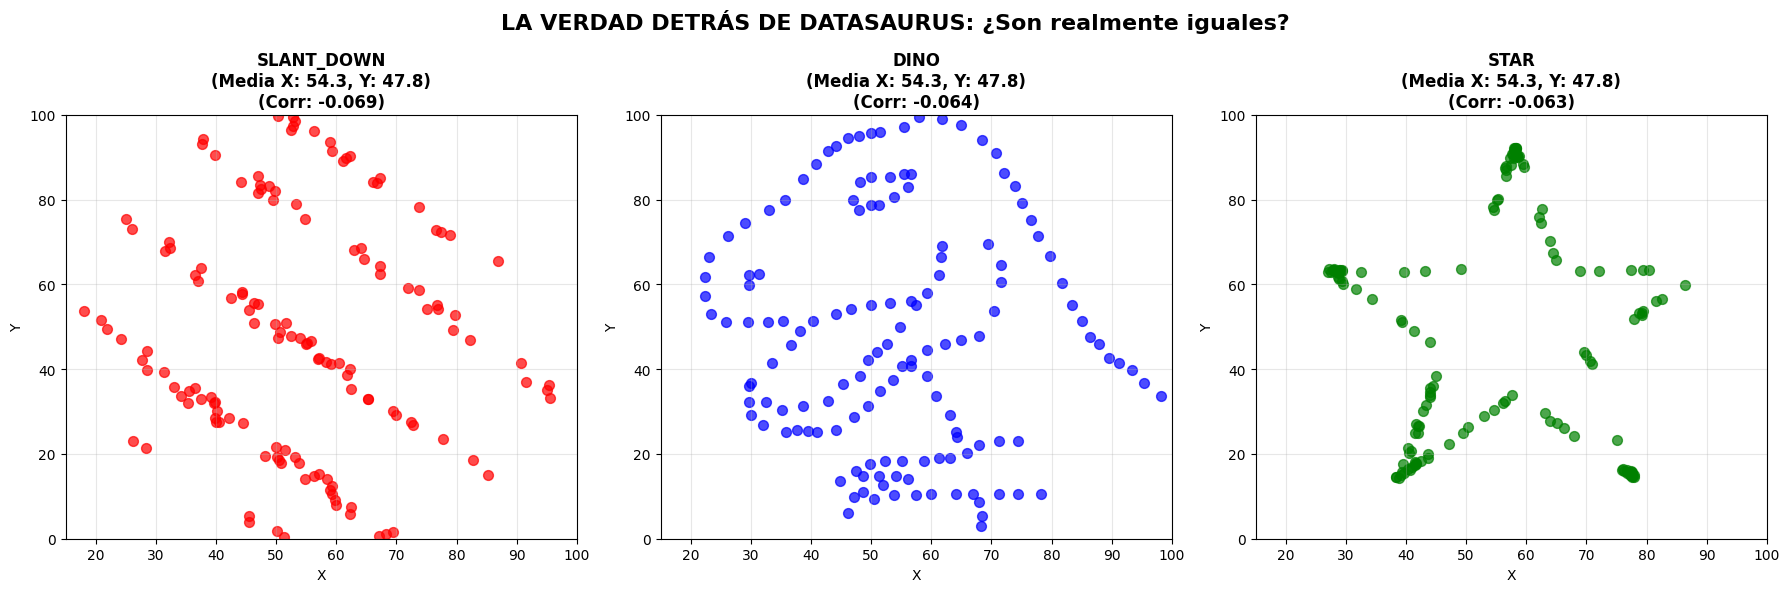

In [28]:
# Análisis Visual - La VERDAD revelada
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('LA VERDAD DETRÁS DE DATASAURUS: ¿Son realmente iguales?', fontsize=16, fontweight='bold')

# Dataset 1: slant_down
axes[0].scatter(df_slant['x'], df_slant['y'], alpha=0.7, s=50, color='red')
axes[0].set_title(f'SLANT_DOWN\n(Media X: {mean_x:.1f}, Y: {mean_y:.1f})\n(Corr: {correlation:.3f})', fontweight='bold')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(15, 100)
axes[0].set_ylim(0, 100)

# Dataset 2: dino
axes[1].scatter(df_dino['x'], df_dino['y'], alpha=0.7, s=50, color='blue')
axes[1].set_title(f'DINO\n(Media X: {mean_x_dino:.1f}, Y: {mean_y_dino:.1f})\n(Corr: {correlation_dino:.3f})', fontweight='bold')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(15, 100)
axes[1].set_ylim(0, 100)

# Dataset 3: star
axes[2].scatter(df_star['x'], df_star['y'], alpha=0.7, s=50, color='green')
axes[2].set_title(f'STAR\n(Media X: {mean_x_star:.1f}, Y: {mean_y_star:.1f})\n(Corr: {correlation_star:.3f})', fontweight='bold')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(15, 100)
axes[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()

Datasets disponibles en Datasaurus Dozen: 13
['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']


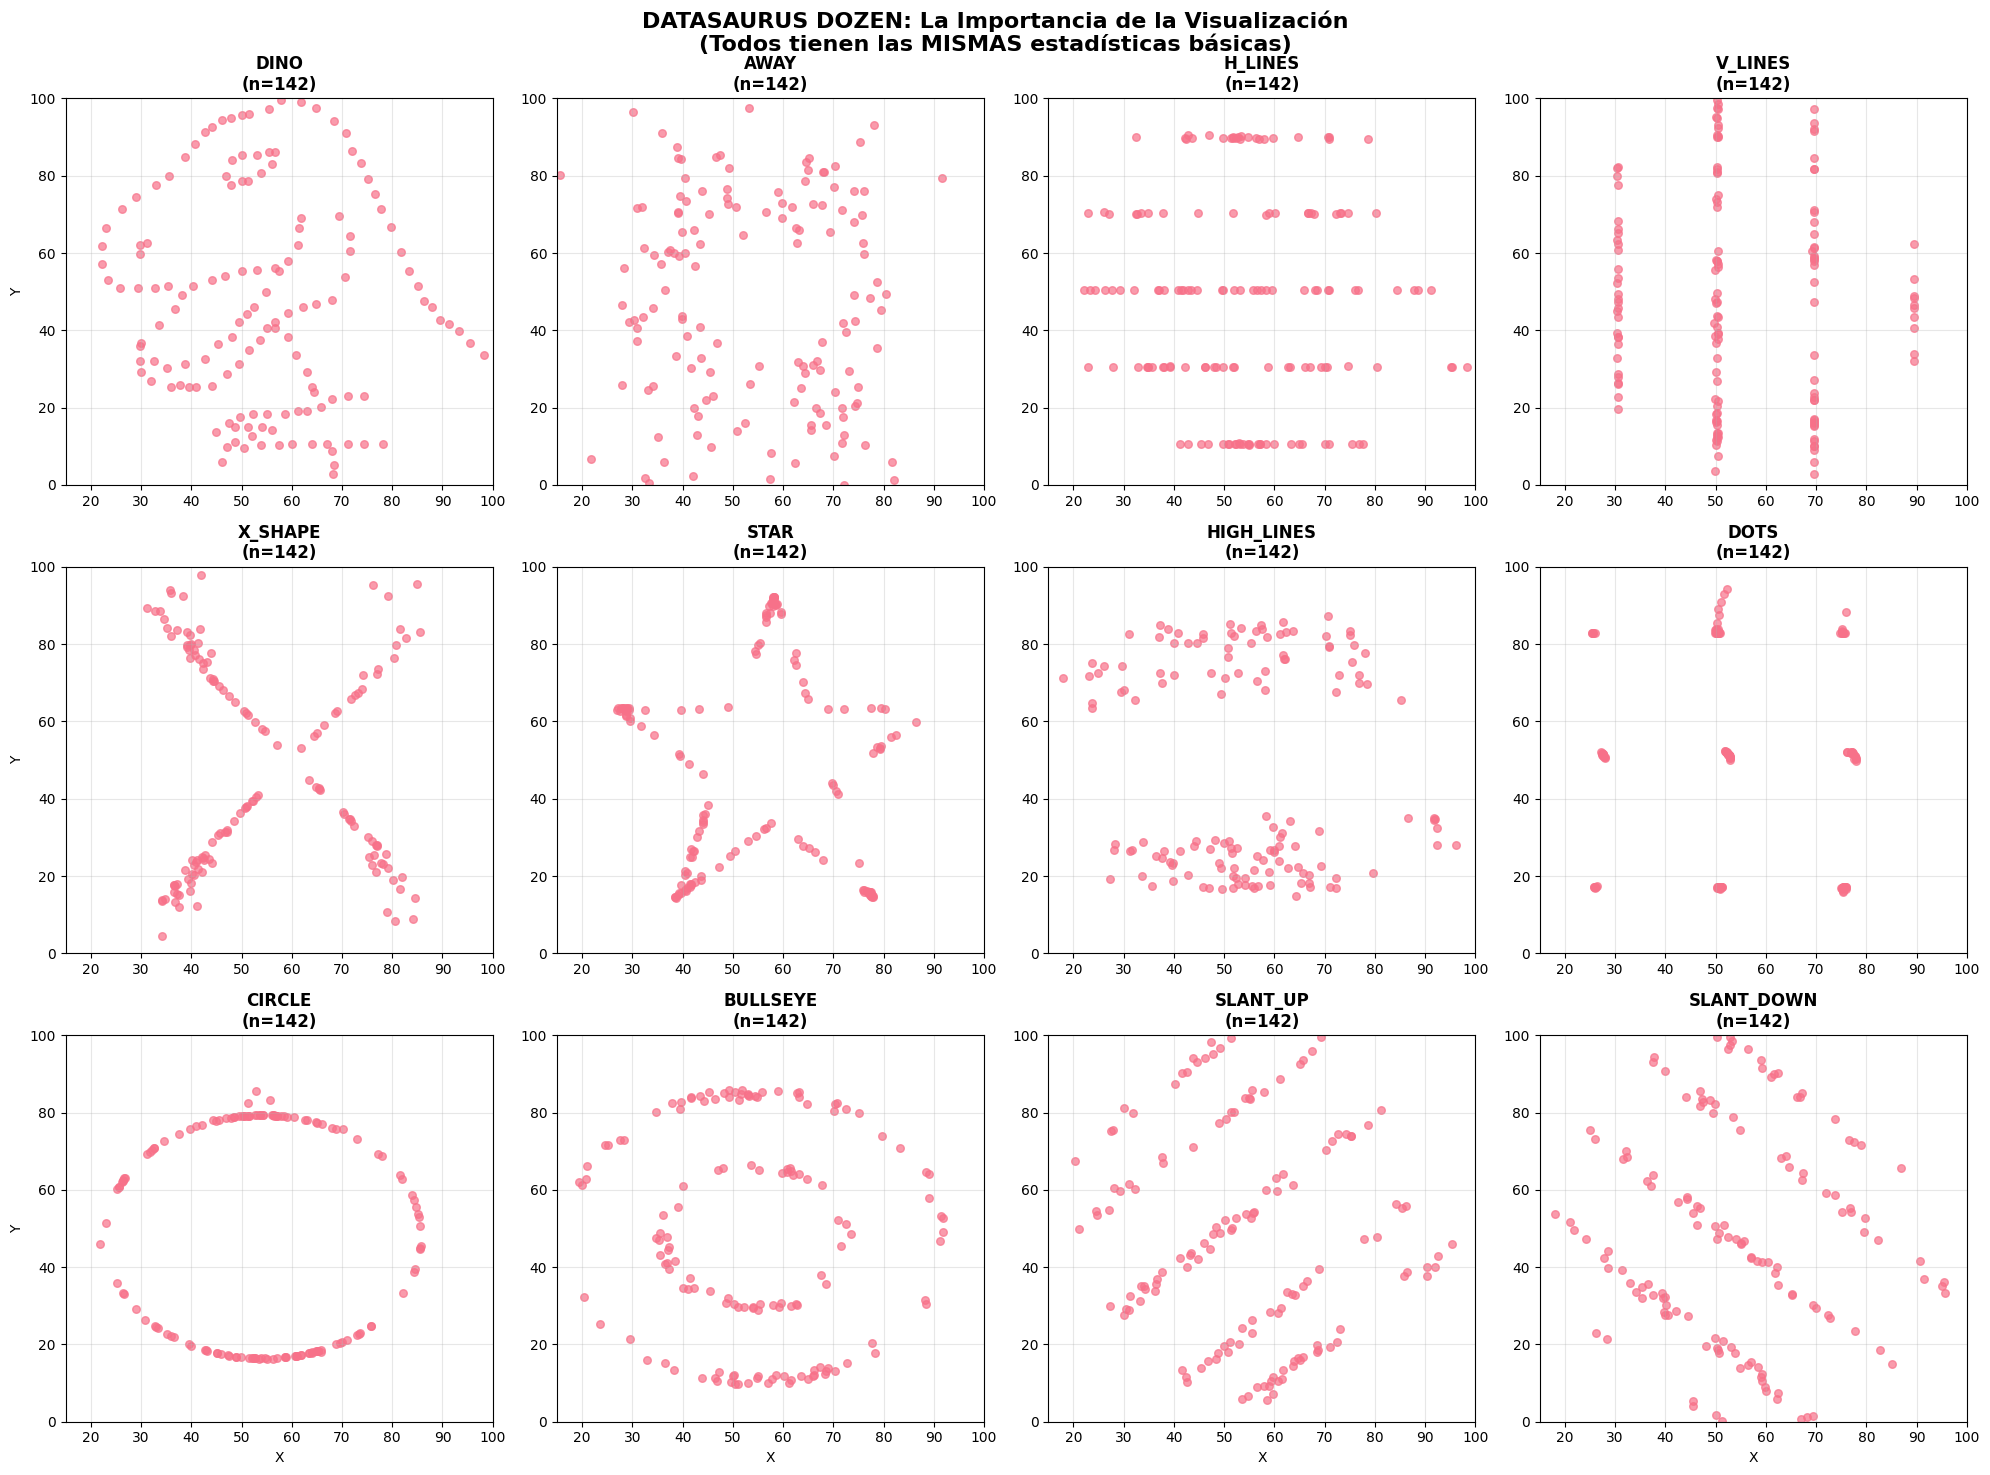

In [29]:
# La GRAN REVELACIÓN: Visualización de TODOS los datasets del Datasaurus Dozen

# Obtener todos los datasets únicos
todos_datasets = df['dataset'].unique()
print(f"Datasets disponibles en Datasaurus Dozen: {len(todos_datasets)}")
print(todos_datasets)

# Crear una visualización masiva
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('DATASAURUS DOZEN: La Importancia de la Visualización\n(Todos tienen las MISMAS estadísticas básicas)',
             fontsize=16, fontweight='bold')

# Plotear cada dataset
for i, dataset_name in enumerate(todos_datasets[:12]):  # Máximo 12 para el grid 3x4
    row = i // 4
    col = i % 4

    data_subset = df[df['dataset'] == dataset_name]

    axes[row, col].scatter(data_subset['x'], data_subset['y'], alpha=0.7, s=30)
    axes[row, col].set_title(f'{dataset_name.upper()}\n(n={len(data_subset)})', fontweight='bold')
    axes[row, col].set_xlim(15, 100)
    axes[row, col].set_ylim(0, 100)
    axes[row, col].grid(True, alpha=0.3)

    if row == 2:  # Última fila
        axes[row, col].set_xlabel('X')
    if col == 0:  # Primera columna
        axes[row, col].set_ylabel('Y')

plt.tight_layout()
plt.show()

In [30]:
# DEMOSTRACIÓN FINAL: Estadísticas de TODOS los datasets
print("DEMOSTRACIÓN FINAL DEL DATASAURUS DOZEN")
print("=" * 60)

# Calcular estadísticas para todos los datasets
estadisticas_completas = []

for dataset_name in todos_datasets:
    data_subset = df[df['dataset'] == dataset_name]

    stats_dataset = {
        'Dataset': dataset_name,
        'N': len(data_subset),
        'Media_X': data_subset['x'].mean(),
        'Media_Y': data_subset['y'].mean(),
        'Std_X': data_subset['x'].std(),
        'Std_Y': data_subset['y'].std(),
        'Correlación': data_subset['x'].corr(data_subset['y'])
    }
    estadisticas_completas.append(stats_dataset)

# Crear DataFrame resumen
df_stats = pd.DataFrame(estadisticas_completas)

# Mostrar estadísticas redondeadas
print("ESTADÍSTICAS DE TODOS LOS DATASETS:")
print(df_stats.round(3))

# Verificar qué tan similares son
print("\n📈 ANÁLISIS DE VARIABILIDAD:")
print(f"Rango de medias X: {df_stats['Media_X'].min():.3f} - {df_stats['Media_X'].max():.3f}")
print(f"Rango de medias Y: {df_stats['Media_Y'].min():.3f} - {df_stats['Media_Y'].max():.3f}")
print(f"Rango de Std X: {df_stats['Std_X'].min():.3f} - {df_stats['Std_X'].max():.3f}")
print(f"Rango de Std Y: {df_stats['Std_Y'].min():.3f} - {df_stats['Std_Y'].max():.3f}")
print(f"Rango de correlaciones: {df_stats['Correlación'].min():.3f} - {df_stats['Correlación'].max():.3f}")

DEMOSTRACIÓN FINAL DEL DATASAURUS DOZEN
ESTADÍSTICAS DE TODOS LOS DATASETS:
       Dataset    N  Media_X  Media_Y   Std_X   Std_Y  Correlación
0         dino  142   54.263   47.832  16.765  26.935       -0.064
1         away  142   54.266   47.835  16.770  26.940       -0.064
2      h_lines  142   54.261   47.830  16.766  26.940       -0.062
3      v_lines  142   54.270   47.837  16.770  26.938       -0.069
4      x_shape  142   54.260   47.840  16.770  26.930       -0.066
5         star  142   54.267   47.840  16.769  26.930       -0.063
6   high_lines  142   54.269   47.835  16.767  26.940       -0.069
7         dots  142   54.260   47.840  16.768  26.930       -0.060
8       circle  142   54.267   47.838  16.760  26.930       -0.068
9     bullseye  142   54.269   47.831  16.769  26.936       -0.069
10    slant_up  142   54.266   47.831  16.769  26.939       -0.069
11  slant_down  142   54.268   47.836  16.767  26.936       -0.069
12  wide_lines  142   54.267   47.832  16.770  26.938

¿Qué hallazgos ha encontrado que sean relevantes?

In [31]:
# HALLAZGOS RELEVANTES Y LECCIONES DEL DATASAURUS DOZEN

print("DATASAURUS DOZEN: LECCIONES FUNDAMENTALES")
print("=" * 55)

print("\nHALLAZGOS PRINCIPALES:")
print("\n1. ESTADÍSTICAS IDÉNTICAS, PATRONES DIFERENTES:")
print("   • Todos los datasets tienen prácticamente las mismas:")
print("     - Medias (X ≈ 54.3, Y ≈ 47.8)")
print("     - Desviaciones estándar (X ≈ 16.8, Y ≈ 26.9)")
print("     - Correlaciones (≈ -0.064)")
print("     - Número de observaciones (142)")

print("\n4. IMPORTANCIA DEL ANÁLISIS VISUAL:")
print("   • Las visualizaciones revelan patrones ocultos")
print("   • Son ESENCIALES antes de cualquier análisis")
print("   • Previenen conclusiones erróneas")


DATASAURUS DOZEN: LECCIONES FUNDAMENTALES

HALLAZGOS PRINCIPALES:

1. ESTADÍSTICAS IDÉNTICAS, PATRONES DIFERENTES:
   • Todos los datasets tienen prácticamente las mismas:
     - Medias (X ≈ 54.3, Y ≈ 47.8)
     - Desviaciones estándar (X ≈ 16.8, Y ≈ 26.9)
     - Correlaciones (≈ -0.064)
     - Número de observaciones (142)

4. IMPORTANCIA DEL ANÁLISIS VISUAL:
   • Las visualizaciones revelan patrones ocultos
   • Son ESENCIALES antes de cualquier análisis
   • Previenen conclusiones erróneas
